[Reference](https://medium.com/@ayushmandurgapal/data-visualization-using-python-1f0b032ff2db)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objects as go

In [2]:
Data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010, 2020],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3, 7.9]
       }

df = pd.DataFrame(Data, columns = ['Year', 'Unemployment_Rate'])

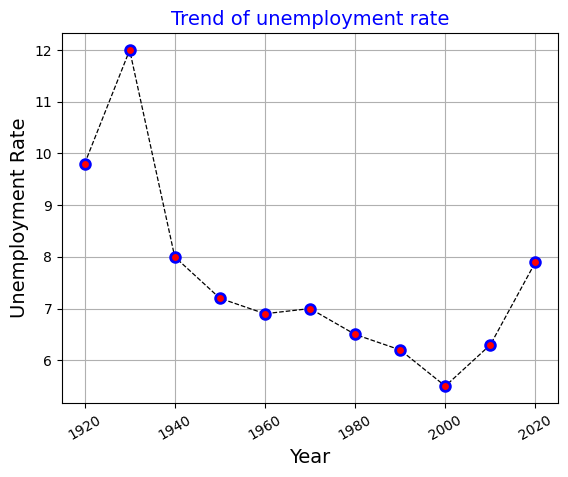

In [3]:
plt.plot(df.Year, df.Unemployment_Rate, marker = 'o', color = 'black',
         linewidth = 0.9, linestyle = '--',
         markeredgecolor = 'blue',
         markeredgewidth = '2.0',
         markerfacecolor = 'red', markersize = 7.0)
plt.title('Trend of unemployment rate', color = 'Blue', size = 14)
plt.xlabel('Year', size = 14)
plt.ylabel('Unemployment Rate', size = 14)
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.xticks(rotation = 30)
plt.show()

In [6]:
# Student Performance Data from Kaggle

df_st = pd.read_csv(r"https://raw.githubusercontent.com/ayushmandurgapal/Data-Visualization-in-Python/main/.csv%20files/StudentsPerformance.csv")
df_st

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


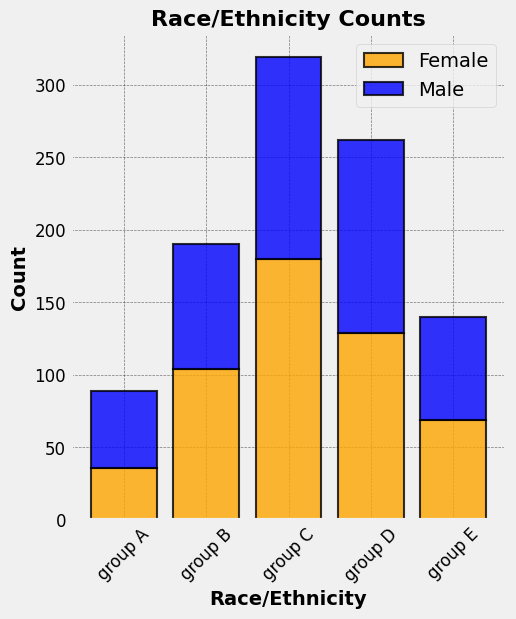

In [7]:
grouped_data = df_st.groupby(['race/ethnicity', 'gender']).size().unstack()

fig = plt.figure(figsize=(5, 6))
plt.style.use('fivethirtyeight')
plt.bar(
    x=grouped_data.index,
    height= grouped_data["female"],
    label = "Female",
    color='orange',      # Set the color of the bars
    edgecolor='black',    # Set the color of the bar edges
    linewidth=1.5,        # Set the width of the bar edges
    alpha=0.8             # Set the transparency of the bars
)

plt.bar(
    x=grouped_data.index,
    height= grouped_data["male"],
    bottom = grouped_data["female"],
    label = "Male",
    color='blue',      # Set the color of the bars
    edgecolor='black',    # Set the color of the bar edges
    linewidth=1.5,        # Set the width of the bar edges
    alpha=0.8             # Set the transparency of the bars
)

plt.xlabel('Race/Ethnicity', fontsize=14, fontweight='bold')  # Set the x-axis label with font size and style
plt.ylabel('Count', fontsize=14, fontweight='bold')           # Set the y-axis label with font size and style
plt.title('Race/Ethnicity Counts', fontsize=16, fontweight='bold')  # Set the chart title with font size and style
plt.xticks(fontsize=12, rotation = 45)    # Set the font size of the x-axis tick labels
plt.yticks(fontsize=12)    # Set the font size of the y-axis tick labels
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5, color = "black")# Display gridlines with a dashed style and reduced opacity
plt.legend()

plt.show()

Text(0.5, 1.0, 'Unemployment Rate Trend')

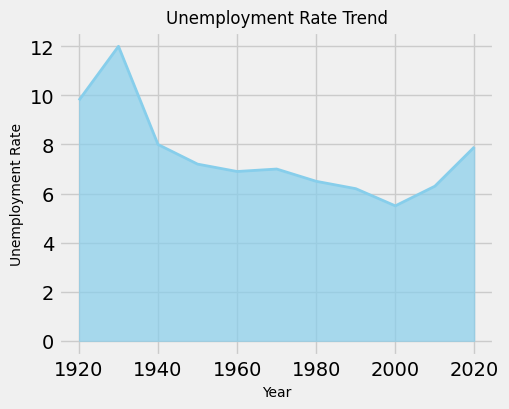

In [5]:
fig = plt.figure(figsize = (5,4))
plt.fill_between(df['Year'], df['Unemployment_Rate'], color='skyblue',
alpha=0.7)
plt.plot(df['Year'], df['Unemployment_Rate'], color='skyblue', linewidth = 2)
plt.xlabel("Year", size = 10)
plt.ylabel("Unemployment Rate", size = 10)
plt.title("Unemployment Rate Trend", size = 12)

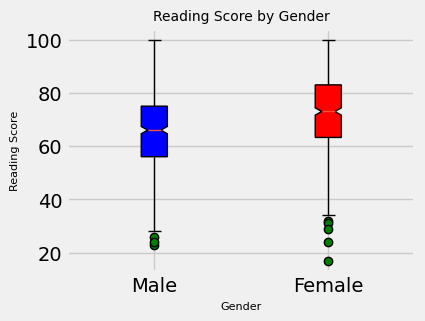

In [8]:
green_diamond = dict(markerfacecolor='g', marker='o')

fig = plt.figure(figsize = (4,3))

_bp = plt.boxplot(
    [df_st[df_st['gender'] == 'male']['reading score'],
     df_st[df_st['gender'] == 'female']['reading score']],
    labels=['Male', 'Female'],
    notch = True,
    flierprops = green_diamond,
    vert = True,
    patch_artist = True)

_colors = ['blue', 'red']

for patch, color in zip(_bp['boxes'], _colors): patch.set_facecolor(color)

plt.xlabel('Gender', size= 8)
plt.ylabel('Reading Score', size = 8)
plt.title('Reading Score by Gender', size= 10)
plt.grid(True)
plt.show()

In [9]:
iris = pd.read_csv("https://raw.githubusercontent.com/ayushmandurgapal/Data-Visualization-in-Python/main/.csv%20files/Iris.csv")

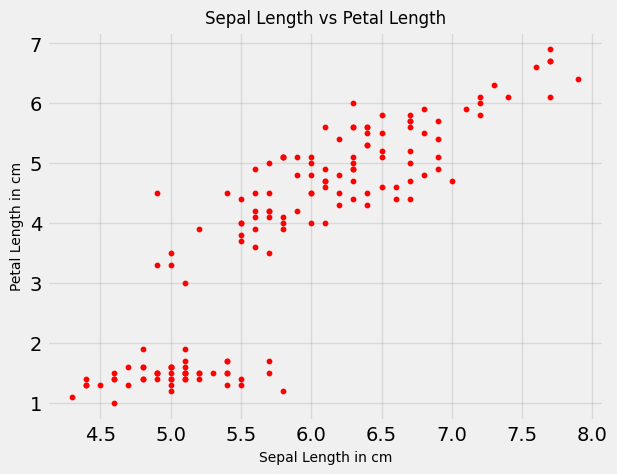

In [10]:
plt.scatter(iris.SepalLengthCm, iris.PetalLengthCm, marker = "o",
            color = "red", linewidths = 1, edgecolors = "red", s = 10)
plt.style.use('fivethirtyeight')
plt.xlabel("Sepal Length in cm", size = 10, color = "black")
plt.ylabel("Petal Length in cm", size = 10, color = "black")
plt.title("Sepal Length vs Petal Length", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.grid(color = "grey", alpha = 0.2)
plt.show()

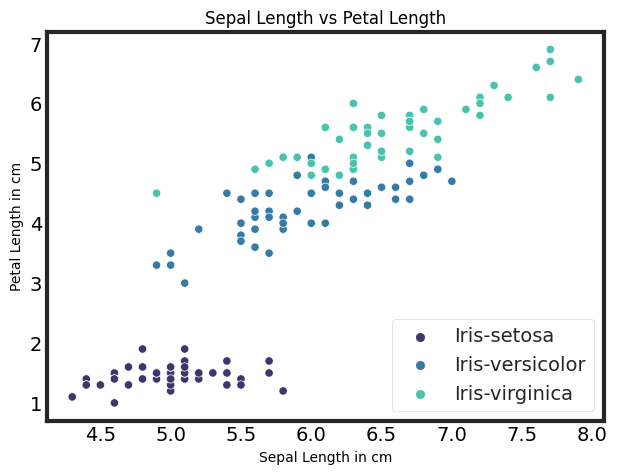

In [11]:
sns.set_style("ticks")
sns.scatterplot(x = iris.SepalLengthCm, y = iris.PetalLengthCm,
                hue = iris.Species, palette = "mako")
plt.xlabel("Sepal Length in cm", size = 10, color = "black")
plt.ylabel("Petal Length in cm", size = 10, color = "black")
plt.title("Sepal Length vs Petal Length", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.legend(loc = "lower right")
plt.show()

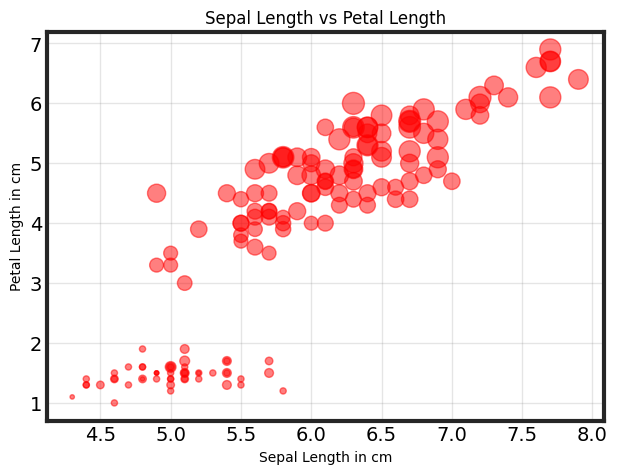

In [12]:
from sklearn.preprocessing import MinMaxScaler

sizes = iris['PetalWidthCm']/iris['PetalWidthCm'].max()

# Here, the size of the bubble will show the Petal Width

plt.figure()
plt.scatter(iris.SepalLengthCm, iris.PetalLengthCm, marker = "o",
            color = "red", linewidths = 1, edgecolors = "red",
            s= sizes*250, alpha = 0.5)
plt.style.use('fivethirtyeight')
plt.xlabel("Sepal Length in cm", size = 10, color = "black")
plt.ylabel("Petal Length in cm", size = 10, color = "black")
plt.title("Sepal Length vs Petal Length", size =12, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.grid(color = "grey", alpha = 0.2)
plt.show()

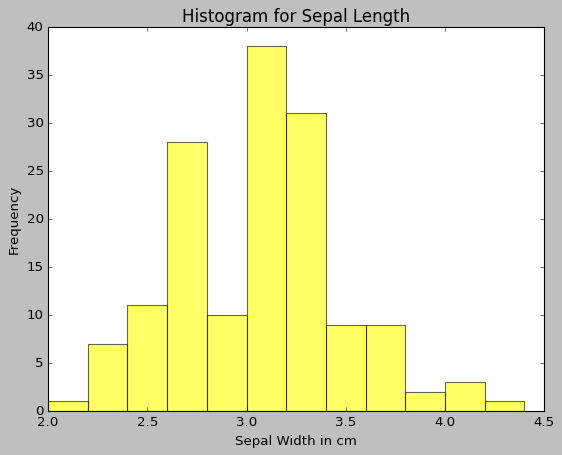

In [13]:
# If bins of specific width are needed
bin_width = 0.2
bins = int((iris.SepalWidthCm.max()-iris.SepalWidthCm.min())/bin_width)
plt.style.use('classic')
plt.hist(iris.SepalWidthCm, bins = bins, color = "yellow", alpha = 0.6,
         orientation = "vertical", rwidth = 1)
plt.xlabel("Sepal Width in cm", size = 12, color = "black")
plt.ylabel("Frequency", size = 12, color = "black")
plt.title("Histogram for Sepal Length", size =15, color = "black")
plt.xticks(color = "black")
plt.yticks(color = "black")
plt.show()

Text(0.5, 1.0, 'Distribution of Different Ethnicties in the Class')

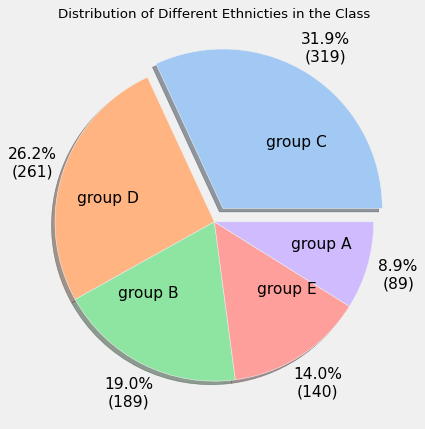

In [14]:
explode = (0.1,0,0,0,0)
colors = sns.color_palette('pastel')[0:5]
plt.style.use("fivethirtyeight")
ethnicity_counts = df_st["race/ethnicity"].value_counts()
plt.pie(df_st["race/ethnicity"].value_counts(),
        labels = df_st["race/ethnicity"].value_counts().index,
        autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*ethnicity_counts.sum())})",
        colors = colors,
        pctdistance = 1.2,
        labeldistance  =0.5,
        explode =explode,
        shadow = True)
plt.title("Distribution of Different Ethnicties in the Class", size = 12)

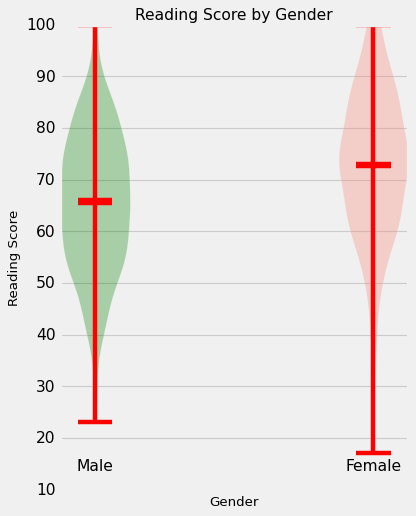

In [15]:
colors = ['green', 'salmon']
plt.figure(figsize = (5,7))
violin_parts = plt.violinplot([df_st[df_st['gender'] == 'male']['reading score'],
              df_st[df_st['gender'] == 'female']['reading score']],
              showmeans = True, showmedians = True,
              widths = 0.1,
              positions = [1,1.4],
              vert = True,
              showextrema = True)
for pc, color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)
labels = ["Male", "Female"]
data = [df_st[df_st['gender'] == 'male']['reading score'], df_st[df_st['gender'] == 'female']['reading score']]

plt.text(1,16,"Male" ,ha='center', va = "top")
plt.text(1.4,16,"Female",ha='center', va = "top")

plt.xlabel('Gender', size= 12)
plt.ylabel('Reading Score', size = 12)
plt.title('Reading Score by Gender', size= 14)
plt.xticks([])
plt.grid(True)
plt.show()

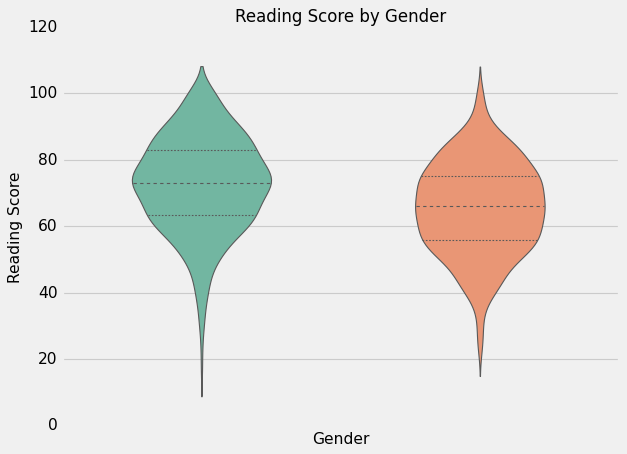

In [16]:
sns.violinplot(data = df_st, y = df_st["reading score"], x = df_st["gender"],
              linewidth =1, scale = "count",
              width = 0.5, inner = "quartile", orient = "v", palette = "Set2")
plt.xlabel('Gender', size= 14)
plt.ylabel('Reading Score', size = 14)
plt.title('Reading Score by Gender', size= 15)
plt.xticks([])
plt.grid(True)
plt.show()

<ipython-input-17-f9e911c1dac2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = iris.corr()


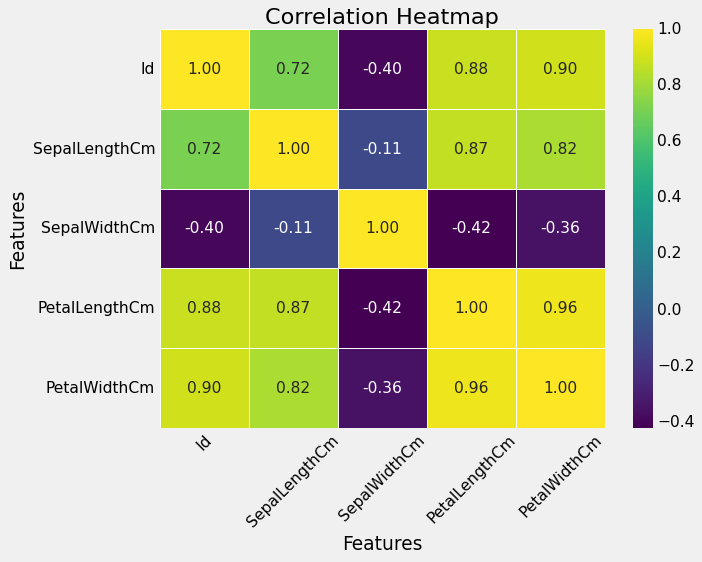

In [17]:
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "viridis",
            fmt = "0.2f", linewidth = 0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation = 45)
plt.show()

In [18]:
import plotly.express as px

fig = px.treemap(df_st, path=['race/ethnicity'], values='reading score',
                 hover_data = ["race/ethnicity", "reading score"],
                 width=800, height=500)

# Customize the treemap
fig.update_layout(title='Treemap of Reading Scores by Race/Ethnicity')

# Show the treemap
fig.show()

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

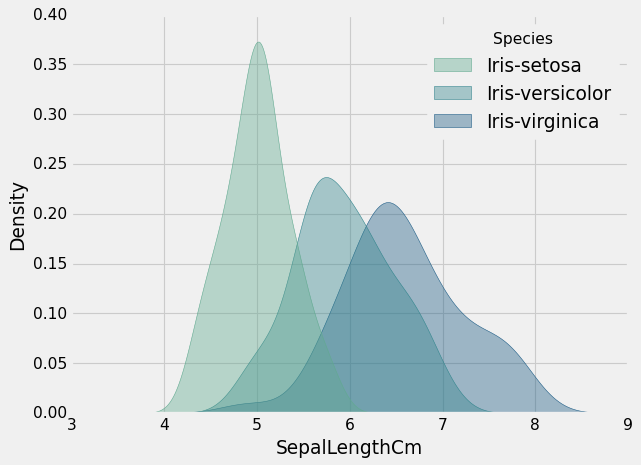

In [19]:
sns.kdeplot(x=iris["SepalLengthCm"], hue = iris["Species"],
            linewidth = 0.5, fill = True, multiple = "layer", cbar = True,
            palette = "crest", alpha = 0.4)

<ipython-input-20-9598aa410ec6>:1: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning:

The following kwargs were not used by contour: 'linewidth'



<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

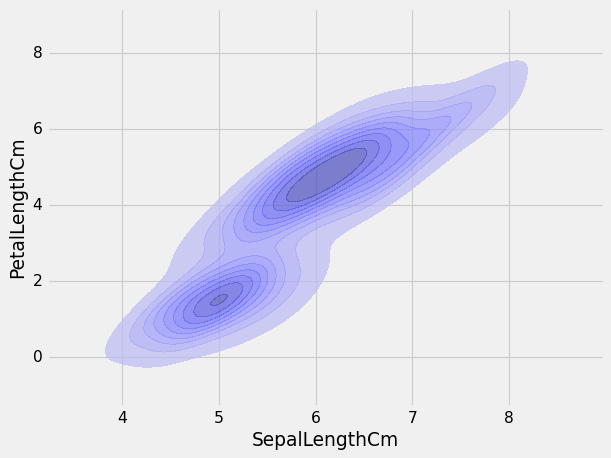

In [20]:
sns.kdeplot(x=iris["SepalLengthCm"], y = iris["PetalLengthCm"], linewidth = 0.5, fill = True, multiple = "layer", cbar = False,
           palette = "crest", alpha = 0.7)

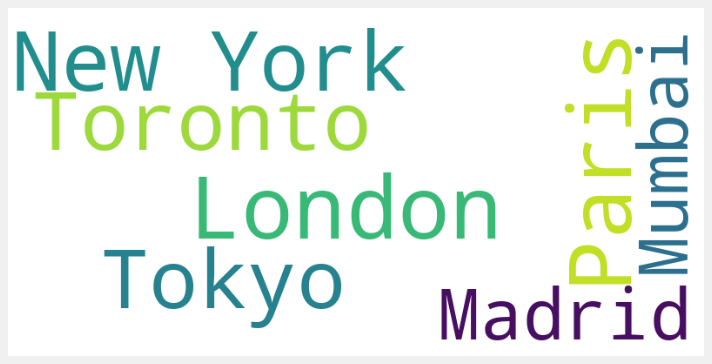

In [21]:
from wordcloud import WordCloud

# Generate random data
categories = ['Madrid', 'New York', 'Mumbai', 'Paris', 'Toronto', 'Tokyo', 'London']
num_data_points = 500
data = np.random.choice(categories, num_data_points)

# Create a DataFrame
df = pd.DataFrame({'Category': data})

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Generate word cloud based on category counts
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='viridis', max_font_size=100, max_words=50,
                      margin = 5, prefer_horizontal = 0.7)
wordcloud.generate_from_frequencies(category_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='race/ethnicity', ylabel='count'>

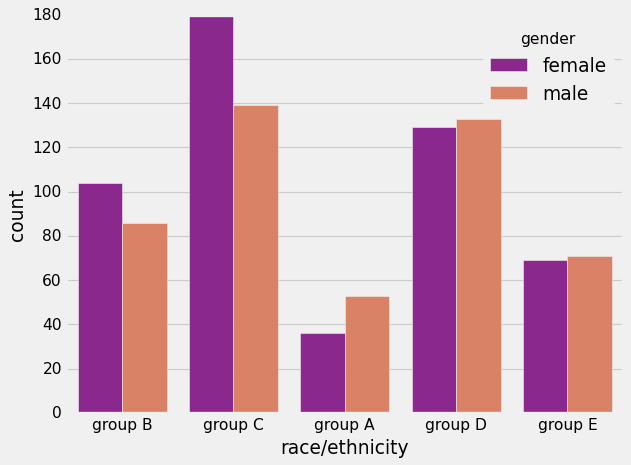

In [22]:
sns.countplot(data = df_st, x = "race/ethnicity", hue = "gender",
              palette = "plasma")

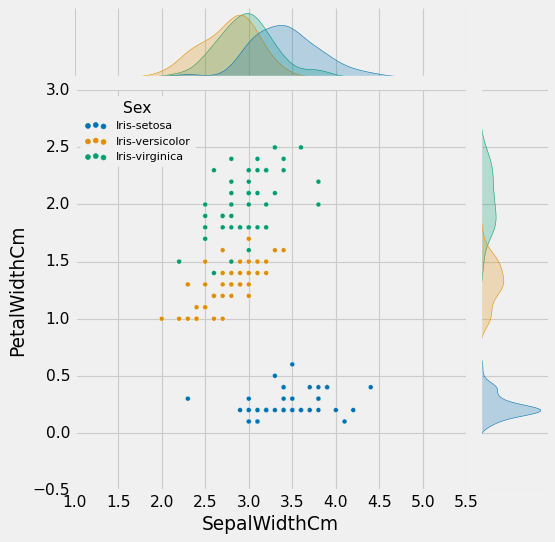

In [23]:
g = sns.jointplot(data = iris, x= "SepalWidthCm", y="PetalWidthCm",
                  hue = "Species", height = 7,
                  palette = "colorblind", marker = "o")

ax = g.ax_joint

# Move the legend to a specific location
ax.legend(title="Sex", loc="upper left", fontsize = 10)

<ipython-input-24-1d7a5826e100>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='SepalWidthCm', ylabel='Density'>

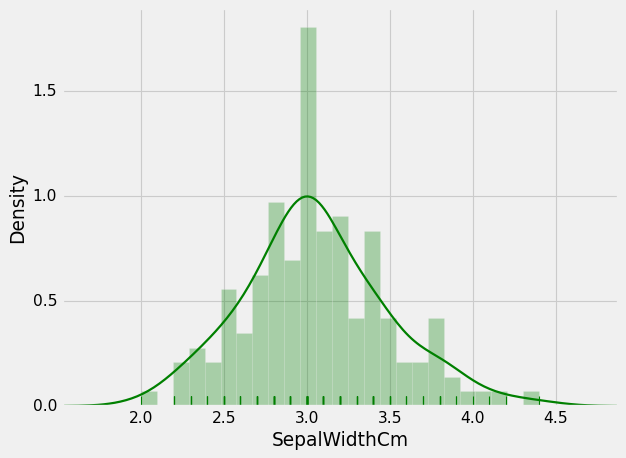

In [24]:
sns.distplot(iris["SepalWidthCm"], bins = 25, kde = True,
             rug = True, color = "green", hist_kws = {"alpha":0.3},
             kde_kws = {"linewidth":2})

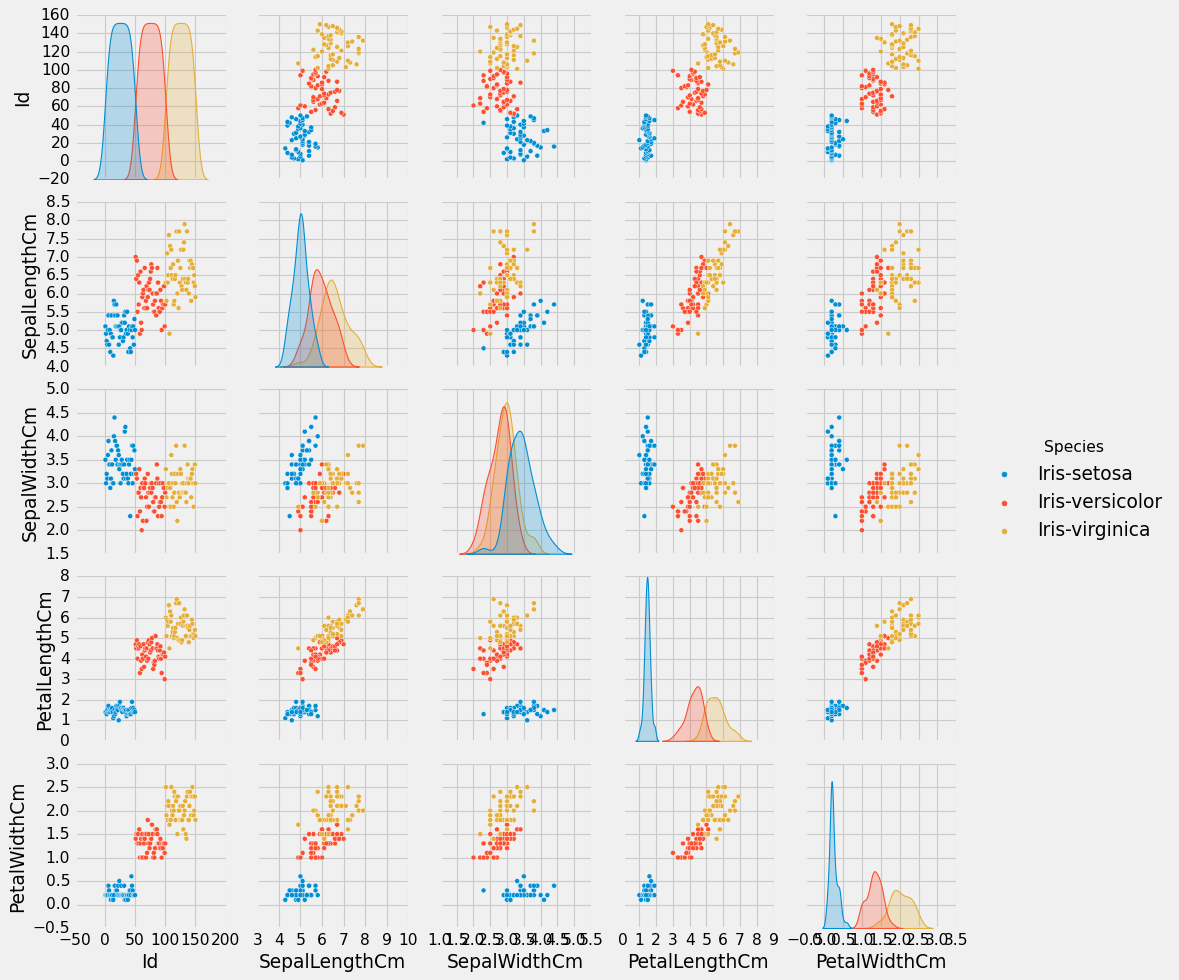

In [25]:
sns.pairplot(data=iris, hue = "Species", corner = False,
             diag_kws = {"linewidth":1, "fill":True},
             plot_kws = dict(marker = "o"))

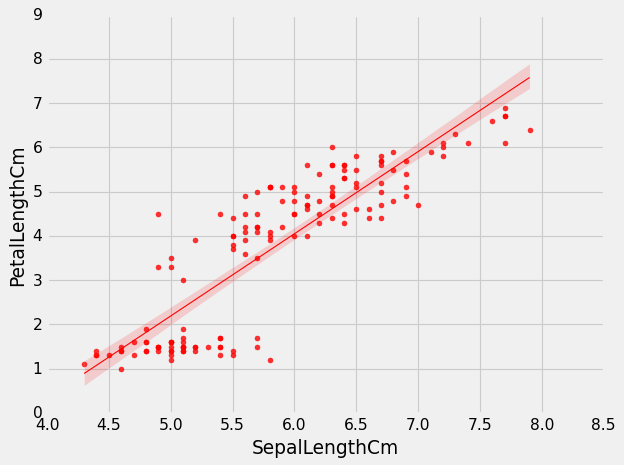

In [26]:
sns.regplot(data = iris, x="SepalLengthCm", y="PetalLengthCm",
            line_kws = dict(linewidth = 1), ci = 95, scatter = True,
            color = "red")
plt.grid(True)

Text(0.5, 0, 'PetalLength in cm')

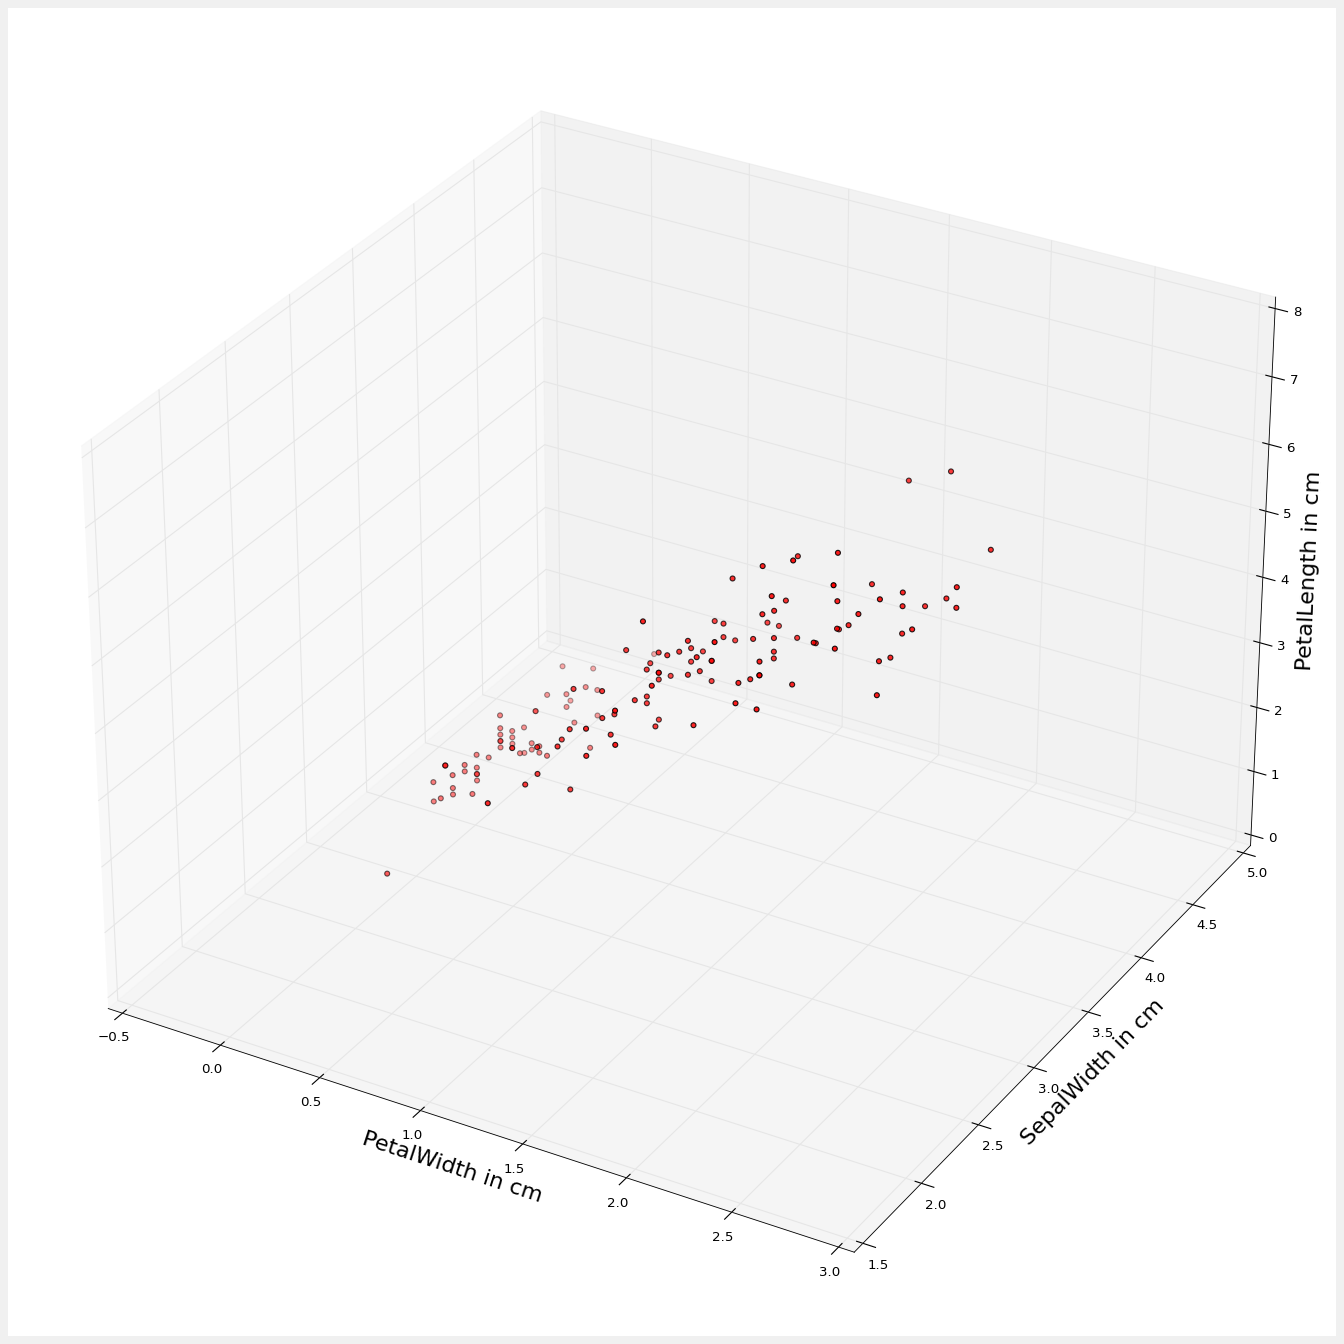

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (20,20))
plt.style.use("classic")
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris["PetalWidthCm"], iris["SepalWidthCm"],iris["PetalLengthCm"], c = "red")
ax.set_xlabel("PetalWidth in cm", fontsize = 20)
ax.set_ylabel("SepalWidth in cm", fontsize = 20)
ax.set_zlabel("PetalLength in cm", fontsize = 20)